<a href="https://colab.research.google.com/github/jbaldacim/ANDE-T2/blob/main/T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Avaliativa I - Análise de Dados do Mercado Imobiliário de Nova York

## Setup Inicial

Importando bibliotecas e conectando à base de dados.

In [571]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix,
    root_mean_squared_error, mean_absolute_error,
    r2_score
)

In [572]:
df = pd.read_csv('https://raw.githubusercontent.com/jbaldacim/ANDE-T2/refs/heads/main/data/mercado_imobiliario_ny.csv')

## Visão Inicial dos Dados

In [573]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0000,1400.0000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.7613,-73.9745
1,Brokered by Serhant,Condo for sale,195000000,7,10.0000,17545.0000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.7664,-73.9810
2,Brokered by Sowae Corp,House for sale,260000,4,2.0000,2015.0000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.5418,-74.1961
3,Brokered by COMPASS,Condo for sale,69000,3,1.0000,445.0000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.7614,-73.9746
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.3739,14175.0000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.7672,-73.9699


Vemos que os dados representam imóveis à venda disponíveis em Nova Iorque, com as seguintes propriedades:

- `BROKERTITLE`: Título do corretor.
- `TYPE`: Tipo do imóvel.
- `PRICE`: Preço do imóvel.
- `BEDS`: Número de quartos.
- `BATH`: Número de banheiros.
- `PROPERTYSQFT`: Área em $\mathrm{m}^2$.
- `ADDRESS`: Endereço completo.
- `STATE`: Estado (NY).
- `MAIN_ADDRESS`: Endereço principal.
- `ADMINISTRATIVE_AREA_LEVEL_2`: Área administrativa secundária.
- `LOCALITY`: Localidade.
- `SUBLOCALITY`: Sublocalidade.
- `STREET_NAME`: Nome da rua.
- `LONG_NAME`: Nome completo da localização.
- `FORMATTED_ADDRESS`: Endereço formatado.
- `LATITUDE`: Latitude geográfica.
- `LONGITUDE`: Longitude geográfica.

In [574]:
print(f'A base contém {df.shape[0]} registros e {df.shape[1]} variáveis.')

A base contém 4801 registros e 17 variáveis.


In [575]:
df.isnull().sum().reset_index().rename(columns={0: "Quantidade de Nulos", "index": "Variável"})

,Variável,Quantidade de Nulos
0,BROKERTITLE,0
1,TYPE,0
2,PRICE,0
3,BEDS,0
4,BATH,0
5,PROPERTYSQFT,0
6,ADDRESS,0
7,STATE,0
8,MAIN_ADDRESS,0
9,ADMINISTRATIVE_AREA_LEVEL_2,0


In [576]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4801.0000,4801.0000,4801.0000,4801.0000,4801.0000,4801.0000
mean,2356940.1710,3.3568,2.3739,2184.2079,40.7142,-73.9416
std,31355246.2604,2.6023,1.9470,2377.1409,0.0877,0.1011
min,2494.0000,1.0000,0.0000,230.0000,40.4995,-74.2530
25%,499000.0000,2.0000,1.0000,1200.0000,40.6394,-73.9871
50%,825000.0000,3.0000,2.0000,2184.2079,40.7267,-73.9492
75%,1495000.0000,4.0000,3.0000,2184.2079,40.7719,-73.8706
max,2147483647.0000,50.0000,50.0000,65535.0000,40.9127,-73.7024


In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

## Endereço com 0 banheiros? Vejamos!

In [578]:
df.loc[df['BATH']==0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
2699,Brokered by COMPASS,Pending,675000,3,0.0000,2780.0000,41 Warren St Unit Subc,"Manhattan, NY 10007","41 Warren St Unit SubcManhattan, NY 10007",New York,New York County,New York,Manhattan,41,"41 Warren St b, New York, NY 10007, USA",40.7144,-74.0089
2704,Brokered by COMPASS,Pending,675000,3,0.0000,2780.0000,41 Warren St Unit Subc,"Manhattan, NY 10007","41 Warren St Unit SubcManhattan, NY 10007",New York,New York County,New York,Manhattan,41,"41 Warren St b, New York, NY 10007, USA",40.7144,-74.0089
3379,Brokered by Brown Harris Stevens,Townhouse for sale,14995000,3,0.0000,2184.2079,50 W 86th St Unit Townhouse,"Manhattan, NY 10024","50 W 86th St Unit TownhouseManhattan, NY 10024",United States,New York,New York County,New York,West 86th Street,"50 W 86th St, New York, NY 10024, USA",40.7860,-73.9718


Os _ids_ `2699` e `2704` parecem duplicados. São mesmo?

In [579]:
df.iloc[2699].equals(df.iloc[2704])

True

Sim! Esses dados estão duplicados! Será que existem mais?

In [580]:
df[df.duplicated(keep=False)]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
80,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.0000,1065.0000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.7834,-73.9500
81,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.0000,1065.0000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.7834,-73.9500
113,Brokered by Sowae Corp,House for sale,400000,4,2.0000,1980.0000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.6654,-73.8771
114,Brokered by Sowae Corp,Multi-family home for sale,346000,5,2.0000,2184.2079,103-12 104th St,"Ozone Park, NY 11417","103-12 104th StOzone Park, NY 11417",United States,New York,Queens County,Queens,104th Street,"103-12 104th St, Jamaica, NY 11417, USA",40.6838,-73.8381
115,Brokered by Sowae Corp,House for sale,400000,4,2.0000,1980.0000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.6654,-73.8771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,NoBroker,Multi-family home for sale,2000000,8,2.3739,2184.2079,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.6148,-73.9757
4770,Brokered by Sotheby's International Realty - E...,Condo for sale,2600000,3,2.0000,1729.0000,242 E 15th St Apt 1,"New York, NY 10003","242 E 15th St Apt 1New York, NY 10003",New York,New York County,New York,Manhattan,242,"242 E 15th St APT 1, New York, NY 10003, USA",40.7330,-73.9850
4775,Brokered by EXIT REALTY PREMIER,House for sale,749000,3,2.3739,2002.0000,631 Essex St,"Brooklyn, NY 11208","631 Essex StBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Essex Street,"631 Essex St, Brooklyn, NY 11208, USA",40.6682,-73.8800
4780,NoBroker,Multi-family home for sale,2000000,8,2.3739,2184.2079,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.6148,-73.9757


Vamos remover os dados duplicados, mantendo apenas uma instância de cada um deles.

In [581]:
df_filtered = df.drop_duplicates()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   object 
 1   TYPE                         4587 non-null   object 
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   int64  
 4   BATH                         4587 non-null   float64
 5   PROPERTYSQFT                 4587 non-null   float64
 6   ADDRESS                      4587 non-null   object 
 7   STATE                        4587 non-null   object 
 8   MAIN_ADDRESS                 4587 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 10  LOCALITY                     4587 non-null   object 
 11  SUBLOCALITY                  4587 non-null   object 
 12  STREET_NAME                  4587 non-null   object 
 13  LONG_NAME              

In [582]:
df_filtered.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4587.0000,4587.0000,4587.0000,4587.0000,4587.0000,4587.0000
mean,2381171.6824,3.3658,2.3777,2177.7124,40.7139,-73.9416
std,32068307.7506,2.6288,1.9685,2283.0956,0.0877,0.1013
min,2494.0000,1.0000,0.0000,230.0000,40.4995,-74.2530
25%,499000.0000,2.0000,1.0000,1200.0000,40.6386,-73.9874
50%,825000.0000,3.0000,2.0000,2184.2079,40.7267,-73.9491
75%,1498500.0000,4.0000,3.0000,2184.2079,40.7719,-73.8695
max,2147483647.0000,50.0000,50.0000,65535.0000,40.9127,-73.7024


Parece estranho também um imóvel acima de U$2 bilhões. Seria um registro válido?

In [583]:
property_most_valued = df_filtered[df_filtered['PRICE'] == df_filtered['PRICE'].max()]
property_most_valued

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.0000,10000.0000,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.5185,-74.2244


In [584]:
df_richmond = df_filtered[df_filtered['SUBLOCALITY'] == 'Richmond County']

df_richmond.sort_values(by='PRICE', ascending=False).head(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.0000,10000.0000,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.5185,-74.2244
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.0000,33000.0000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.5950,-74.1064
2653,Brokered by NEUHAUS REALTY INC.,Multi-family home for sale,10700000,42,43.0000,27152.0000,646-662 Port Richmond Ave,"Staten Island, NY 10302","646-662 Port Richmond AveStaten Island, NY 10302",United States,New York,Richmond County,Staten Island,Port Richmond Avenue,"646 Port Richmond Ave, Staten Island, NY 10302...",40.6277,-74.1424
3524,Brokered by Corcoran Brooklyn Heights,House for sale,6700000,3,2.3739,2184.2079,450 Front St,"Staten Island, NY 10304","450 Front StStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Front Street,"450 Front St, Staten Island, NY 10304, USA",40.6262,-74.0746
1295,Brokered by Joanne Costa Realty,Multi-family home for sale,3995000,3,2.3739,12200.0000,639 Tompkins Ave,"Staten Island, NY 10305","639 Tompkins AveStaten Island, NY 10305",United States,New York,Richmond County,Staten Island,Tompkins Avenue,"639 Tompkins Ave., Staten Island, NY 10305, USA",40.6107,-74.0702


Aqui ficou claro que o outlier de preço é um registro errado, já que casas da mesma área com mais quartos, metros quadrados e banheiros têm um preço muito menor. Agora, vamos investigar o outlier da metragem.

Há outros imóveis do tipo que têm uma área maior, então não parece ser outro caso de registro errado. Agora, vamos limpar a base do registro errado.

In [585]:
df_filtered = df_filtered[df_filtered['PRICE'] != 2147483647]

In [586]:
df_filtered.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4586.0000,4586.0000,4586.0000,4586.0000,4586.0000,4586.0000
mean,1913421.4697,3.3650,2.3769,2176.0067,40.7140,-73.9415
std,4979039.9128,2.6285,1.9680,2280.4197,0.0877,0.1012
min,2494.0000,1.0000,0.0000,230.0000,40.4995,-74.2530
25%,499000.0000,2.0000,1.0000,1200.0000,40.6386,-73.9874
50%,825000.0000,3.0000,2.0000,2184.2079,40.7267,-73.9491
75%,1497250.0000,4.0000,3.0000,2184.2079,40.7719,-73.8694
max,195000000.0000,50.0000,50.0000,65535.0000,40.9127,-73.7024


## Remoção de Outliers

In [587]:
def detectar_outliers_iqr(coluna):
    Q1 = df_filtered[coluna].quantile(0.25)
    Q3 = df_filtered[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df_filtered[(df_filtered[coluna] < limite_inferior) | (df_filtered[coluna] > limite_superior)]
    return outliers

outliers_colunas = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

for coluna in outliers_colunas:
    outliers = detectar_outliers_iqr(coluna)
    df_filtered = df_filtered.drop(outliers.index)

In [588]:
df_filtered = df_filtered.dropna()

## Visualizações

### Histogramas

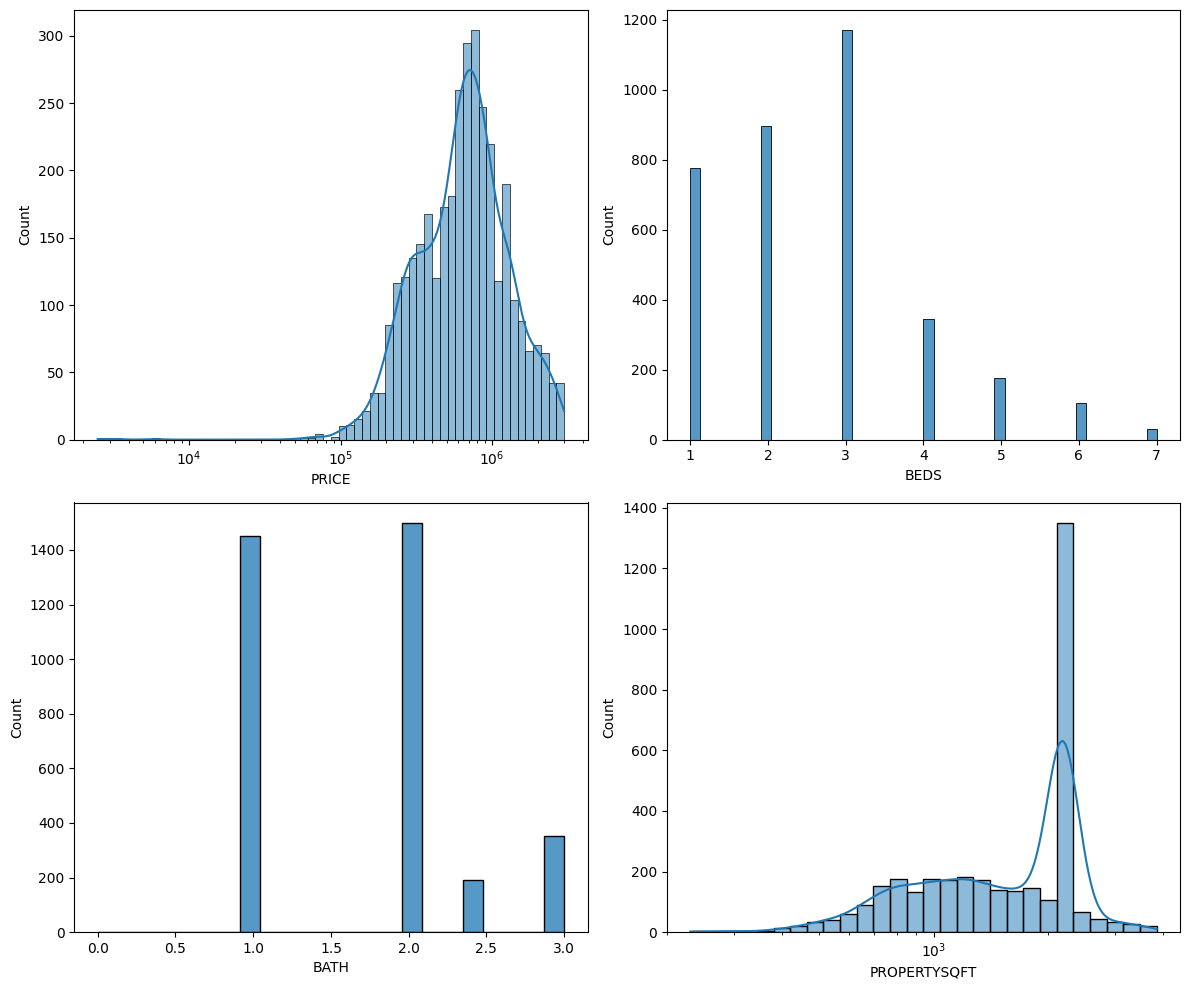

In [589]:
cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axs_flat = axs.flatten()

for idx, col in enumerate(cols):
    sns.histplot(
        data=df_filtered[col],
        ax=axs_flat[idx],
        log_scale=True if col == 'PRICE' or col == 'PROPERTYSQFT' else False,
        kde=True if col == 'PRICE' or col == 'PROPERTYSQFT' else False
    )

plt.tight_layout()
plt.show()

### Boxplot

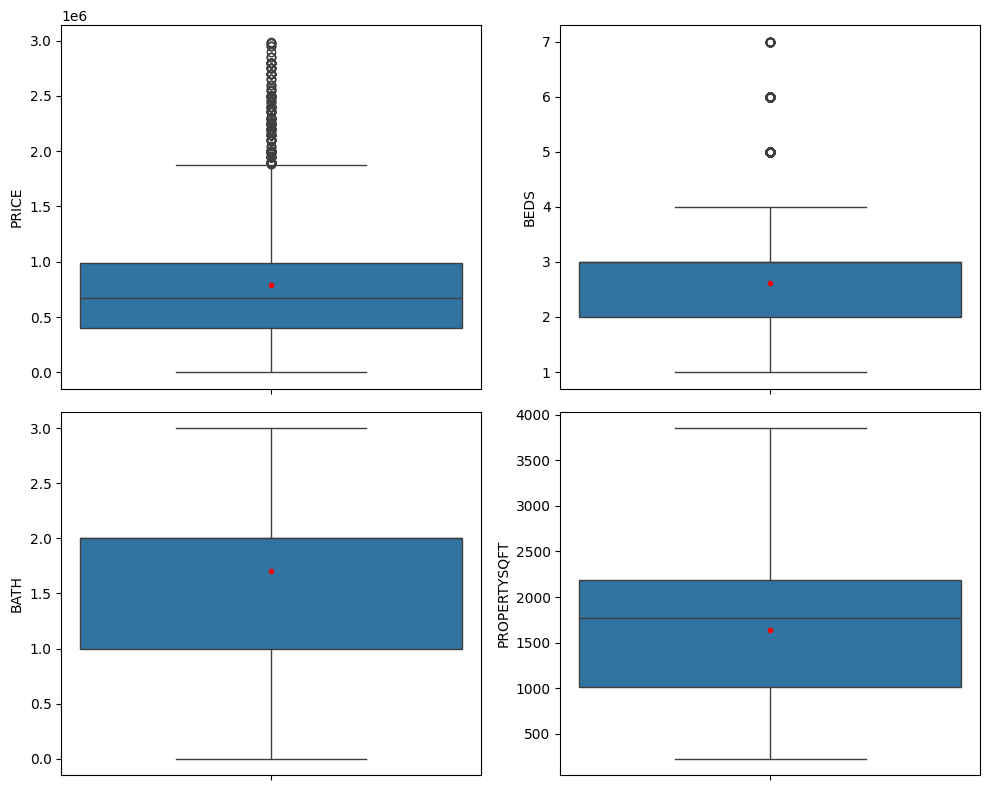

In [590]:
cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axs_flat = axs.flatten()

for idx, col in enumerate(cols):
    sns.boxplot(
        data=df_filtered[col],
        ax=axs_flat[idx],
        # log_scale=True,
    )
    axs_flat[idx].plot(df_filtered[col].mean(), 'r.')

plt.tight_layout()
plt.show()

### Matriz de Correlação

In [591]:
corr = df_filtered.select_dtypes(include='number').corr()

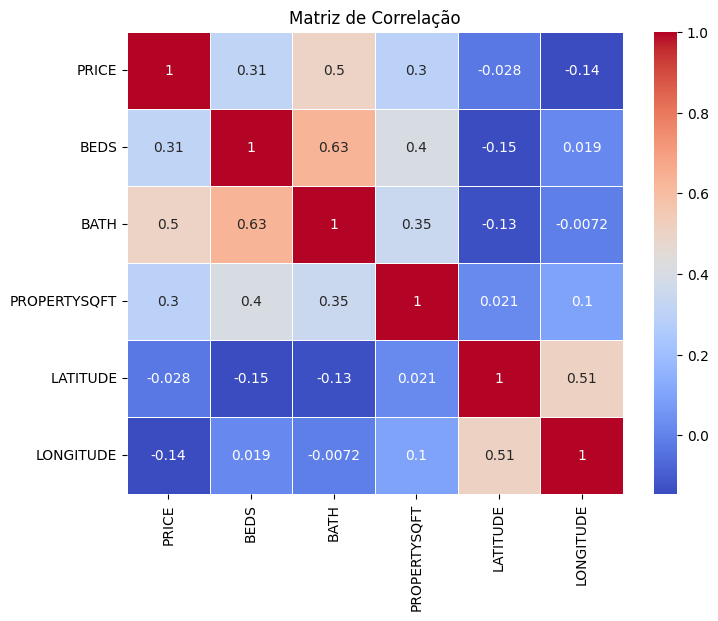

In [592]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Matriz de Correlação')
plt.show()

Há uma correlação aparentemente forte entre a área do imóvel, o número de quartos e banheiros, o que faz muito sentido.

## Análise aprofundade: `SUBLOCALITY`

In [593]:
df_filtered.reset_index(inplace=True)
df_filtered = df_filtered.drop(['index'], axis=1)
df_filtered.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [594]:
import plotly.express as px

fig = px.scatter_map(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="SUBLOCALITY",
    zoom=9.5,
    height=600
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

Existem dezenas de sublocalidades no conjunto, o que dificulta a análise. Contudo, Nova Iorque é dividida em 5 grandes condados: *New York County*, *Kings County*, *Queens County*, *Bronx County* e *Richmond County*. Vamos então adicionar uma coluna `COUNTY` para tentar resolver a alta quantidade de sublocalidades.

In [595]:
def map_to_county(sublocality):
    if pd.isna(sublocality):
        return None

    name = sublocality.lower()

    if any(k in name for k in ['manhattan', 'new york county', 'upper east', 'upper west', 'midtown', 'harlem', 'soho', 'tribeca', 'financial district']):
        return 'New York'
    elif any(k in name for k in ['brooklyn', 'kings county', 'fort hamilton', 'bay ridge', 'dyker heights', 'bensonhurst', 'flatbush', 'bushwick', 'williamsburg', 'park slope', 'coney island', 'bedford-stuyvesant']):
        return 'Kings'
    elif any(k in name for k in ['queens', 'queens county', 'flushing', 'jamaica', 'astoria', 'long island city', 'forest hills', 'rego park', 'far rockaway']):
        return 'Queens'
    elif any(k in name for k in ['bronx', 'bronx county', 'east bronx', 'west bronx', 'mott haven', 'fordham', 'riverdale', 'pelham bay', 'throggs neck', 'co-op city']):
        return 'Bronx'
    elif any(k in name for k in ['staten island', 'richmond county', 'st. george', 'tottenville', 'great kills', 'new dorp', 'stapleton']):
        return 'Richmond'
    else:
        return 'Outros'

df_filtered['COUNTY'] = df_filtered['SUBLOCALITY'].apply(map_to_county)

In [596]:
fig = px.scatter_map(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="COUNTY",
    hover_data=[df_filtered.index],
    zoom=9.5,
    height=600
)


fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

Agora colorindo os pontos por condado, percebemos que algumas entradas, apesar de claramente pertencerem à um condado, foram atribuídas como `Outros`. Podemos utilizar o algoritmo *K-Nearest Neighbors* — KNN — ou *K Vizinhos Mais Próximos*, que classifica um dado baseado nas *k* entradas mais próximas.

In [597]:
from collections import Counter
from sklearn.neighbors import NearestNeighbors

# Dados com COUNTY conhecido
df_known = df_filtered[df_filtered['COUNTY'] != 'Outros']
X_known = df_known[['LATITUDE', 'LONGITUDE']]

# Dados com COUNTY desconhecido
df_unknown = df_filtered[df_filtered['COUNTY'] == 'Outros']
X_unknown = df_unknown[['LATITUDE', 'LONGITUDE']]

nn = NearestNeighbors(n_neighbors=1, metric='haversine', algorithm="ball_tree")
nn.fit(X_known)

# Buscar o vizinho mais próximo
dist, indices = nn.kneighbors(X_unknown)

# Obter os counties previstos
predicted_counties = []
for neighbor_indices in indices:
    neighbor_counties = df_known.iloc[neighbor_indices]['COUNTY'].values
    most_common = Counter(neighbor_counties).most_common(1)[0][0]
    predicted_counties.append(most_common)

# Atribuir coluna PREDICTED_COUNTY (somente onde COUNTY está ausente)
df_filtered.loc[df_filtered['COUNTY'] == 'Outros', 'PREDICTED_COUNTY'] = predicted_counties

In [598]:
import plotly.graph_objects as go

fig = px.scatter_map(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="PREDICTED_COUNTY",
    hover_data=[df_filtered.index, "COUNTY", "PREDICTED_COUNTY"],
    zoom=9.5,
    height=600
)

fig.add_trace(go.Scattermap(
    mode="markers",
    lon=df_known['LONGITUDE'],
    lat=df_known['LATITUDE'],
    marker={'size': 3, 'color': 'black', 'symbol': 'circle'},
    text=df_known['COUNTY'],
    showlegend=False,
    customdata=df_known['COUNTY'],
    hovertemplate='County: %{customdata}<extra></extra>'
))

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [599]:
df_filtered.loc[[1065, 1198, 3384], 'PREDICTED_COUNTY'] = 'New York'
df_filtered.iloc[[1065, 1198, 3384]]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,COUNTY,PREDICTED_COUNTY
1065,Brokered by Commerce Realty Group,Condo for sale,575000,3,2.0000,877.0000,61-20 71st Ave Unit F2A,"Ridgewood, NY 11385","61-20 71st Ave Unit F2ARidgewood, NY 11385",New York,Queens County,Queens,Ridgewood,61-20,"61-20 71st Ave #2f, Ridgewood, NY 11385, USA",40.7020,-73.8942,Queens,New York
1198,Brokered by Brown Harris Stevens,Co-op for sale,192500,1,1.0000,2184.2079,555 Kappock St Apt 12F,"Bronx, NY 10463","555 Kappock St Apt 12FBronx, NY 10463",New York,Bronx County,The Bronx,Spuyten Duyvil,555,"555 Kappock St #12f, Bronx, NY 10463, USA",40.8781,-73.9171,Bronx,New York
3384,Brokered by Weichert Realtors TMT Group,Co-op for sale,495000,2,2.0000,800.0000,92-30 56 Ave Unit 1N,"Elmhurst, NY 11373","92-30 56 Ave Unit 1NElmhurst, NY 11373",New York,Queens County,Queens,Elmhurst,9230,"9230 56th Ave Apt 1b, Elmhurst, NY 11373, USA",40.7365,-73.8701,Queens,New York


In [600]:
df_filtered.loc[df_filtered['COUNTY'] == 'Outros', 'COUNTY'] = df_filtered.loc[df_filtered['COUNTY'] == 'Outros', 'PREDICTED_COUNTY']

In [601]:
fig = px.scatter_map(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="COUNTY",
    hover_data=[df_filtered.index],
    zoom=9.5,
    height=600
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [602]:
reassignments = [
    {
        'county': 'New York',
        'ids': [
            2381, 2311, 129, 241,
            2543, 460, 1422, 2536,
            1183, 812, 499, 2587,
            911
          ]
    },
    {
        'county': 'Queens',
        'ids': [636, 1281, 3613, 2753]
    },
    {
        'county': 'Bronx',
        'ids': [236]
    },
]

for reassignment in reassignments:
    county = reassignment['county']
    ids = reassignment['ids']
    df_filtered.loc[df_filtered.index.isin(ids), 'COUNTY'] = county

In [603]:
fig = px.scatter_map(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="COUNTY",
    hover_data=[df_filtered.index],
    zoom=9.5,
    height=600
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [604]:
# Ao transformar os preços em logaritmo natural, melhoramos o resultado
# das regressões por diminuirmos a escala
df_filtered['PRICE_LOG'] = np.log1p(df_filtered['PRICE'])

In [605]:
fig = px.scatter_map(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="PRICE_LOG",
    hover_data=["PRICE", "BEDS", "BATH", "PRICE_LOG",],
    zoom=9.5,
    height=600,
    color_continuous_scale="Cividis_r"
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

## Regressão

Para testarmos os algoritmos de regressão, tentaremos prever o preço do imóvel baseado nas suas características.

### Pré-processamento Básico

#### Definição de `X` e `y`

In [606]:
cols = ['BEDS', 'BATH', 'PROPERTYSQFT', 'COUNTY', 'PRICE_LOG']

data = df_filtered[cols].copy()

X = data[['BEDS', 'BATH', 'PROPERTYSQFT', 'COUNTY']]
y = data['PRICE_LOG']

#### Divisão Treino-Teste

In [607]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    random_state=42
)
print(f"Tamanho do X_train: {X_train.shape}")
print(f"Tamanho do X_test: {X_test.shape}")

Tamanho do X_train: (2445, 4)
Tamanho do X_test: (1048, 4)


#### Padronização

In [608]:
numerical_features = ['BEDS', 'BATH', 'PROPERTYSQFT']

scaler = StandardScaler()

# Ajusta o scaler com dados de treino
scaler.fit(X_train[numerical_features])

# Transforma os dados de treino e de teste
X_train_scaled = scaler.transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

X_train_scaled_df.head()

,BEDS,BATH,PROPERTYSQFT
1426,0.2982,0.4639,-0.4089
231,-0.4701,0.4639,0.8216
1084,1.8347,0.4639,0.9467
3180,0.2982,-1.0539,0.8216
1867,-1.2383,-1.0539,0.8216


#### Encoding

In [609]:
categorical_features = ['COUNTY']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajusta o encoder com dados de treino
encoder.fit(X_train[categorical_features])

# Transforma os dados de treino e de teste
X_train_encoded = encoder.transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Converte de volta para DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

X_train_encoded_df.head()

,COUNTY_Bronx,COUNTY_Kings,COUNTY_New York,COUNTY_Queens,COUNTY_Richmond
1426,0.0000,0.0000,0.0000,0.0000,1.0000
231,0.0000,0.0000,1.0000,0.0000,0.0000
1084,0.0000,1.0000,0.0000,0.0000,0.0000
3180,0.0000,0.0000,0.0000,1.0000,0.0000
1867,0.0000,0.0000,0.0000,1.0000,0.0000


#### Juntar dados

In [610]:
X_train_processed = pd.concat([X_train_scaled_df, X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_df, X_test_encoded_df], axis=1)

print("--- DADOS FINAIS DE TREINO PRONTOS PARA O MODELO ---")
print(X_train_processed.head())
print("\nDimensões:", X_train_processed.shape)

print("\n--- DADOS FINAIS DE TESTE PRONTOS PARA O MODELO ---")
print(X_test_processed.head())
print("\nDimensões:", X_test_processed.shape)

--- DADOS FINAIS DE TREINO PRONTOS PARA O MODELO ---
        BEDS    BATH  PROPERTYSQFT  COUNTY_Bronx  COUNTY_Kings  \
1426  0.2982  0.4639       -0.4089        0.0000        0.0000   
231  -0.4701  0.4639        0.8216        0.0000        0.0000   
1084  1.8347  0.4639        0.9467        0.0000        1.0000   
3180  0.2982 -1.0539        0.8216        0.0000        0.0000   
1867 -1.2383 -1.0539        0.8216        0.0000        0.0000   

      COUNTY_New York  COUNTY_Queens  COUNTY_Richmond  
1426           0.0000         0.0000           1.0000  
231            1.0000         0.0000           0.0000  
1084           0.0000         0.0000           0.0000  
3180           0.0000         1.0000           0.0000  
1867           0.0000         1.0000           0.0000  

Dimensões: (2445, 8)

--- DADOS FINAIS DE TESTE PRONTOS PARA O MODELO ---
        BEDS    BATH  PROPERTYSQFT  COUNTY_Bronx  COUNTY_Kings  \
1945  0.2982  1.9817        0.1734        0.0000        0.0000   
3362  0

### Treinamento

Criaremos uma variável `regression_results` para guardar os resultados e uma função para avaliar os modelos.

In [611]:
regression_results = []

In [612]:
def avaliar_modelo_regressao(y_true, y_pred, nome="Modelo"):
  mae = mean_absolute_error(y_test, y_pred)
  rmse = root_mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  regression_results.append({'Modelo': nome, 'MAE': mae, 'RMSE': rmse, 'R2': r2})
  print(f"Modelo: {nome}")
  print(f"MAE: {mae:,.2f}")
  print(f"RMSE: {rmse:,.2f}")
  print(f"R²: {r2:.4f}")

#### Regressão Linear

O modelo de Regressão Linear simples não possui hiperparâmetros.

In [613]:
lsqr_model = LinearRegression()
lsqr_model.fit(X_train_processed, y_train)

pred_lr = lsqr_model.predict(X_test_processed)

avaliar_modelo_regressao(y_test, pred_lr, "Regressão Linear")

Modelo: Regressão Linear
MAE: 0.37
RMSE: 0.50
R²: 0.4867


#### Árvore de Regressão

Na Árvore de Regressão, utilizaremos os hiperparâmetros `max_depth = 10` e `min_samples_leaf = 5` para evitar que o algoritmo aprenda com os ruídos do dataset e, consequentemente, evitar _overfitting_. Esses valores representam um equilíbrio em profundidade e abrangência, para que a árvore não se torne muito simples nem muito específica.

In [614]:
max_depth = 10
min_samples_leaf = 5

tree_model = DecisionTreeRegressor(
  max_depth=max_depth,
  min_samples_leaf=min_samples_leaf,
  random_state=42
)

tree_model.fit(X_train_processed, y_train)

pred_tree = tree_model.predict(X_test_processed)

avaliar_modelo_regressao(y_test, pred_tree, 'Árvore de Regressão')

Modelo: Árvore de Regressão
MAE: 0.33
RMSE: 0.47
R²: 0.5315


#### Random Forest Regressor

Aqui definiremos `n_estimators = 100` para obter um resultado satisfatório sem elevar demasiadamente o custo computacional, `max_depth = 15` e `min_samples_leaf = 4` pois o algoritmo Random Forest tem uma tendência menor ao _overfitting_.

In [615]:
n_estimators = 100
max_depth = 15
min_samples_leaf = 5

rf_model = RandomForestRegressor(
  n_estimators=n_estimators,
  max_depth=max_depth,
  min_samples_leaf=min_samples_leaf,
  random_state=42,
)

rf_model.fit(X_train_processed, y_train)

pred_rf = rf_model.predict(X_test_processed)

avaliar_modelo_regressao(y_test, pred_rf, 'Random Forest')

Modelo: Random Forest
MAE: 0.32
RMSE: 0.45
R²: 0.5704


#### SVR

Os hiperparâmetros do SVR foram mantidos no padrão da biblioteca, que são considerados modernos.

In [616]:
svr_model = SVR()

svr_model.fit(X_train_processed, y_train)

pred_svr = svr_model.predict(X_test_processed)

avaliar_modelo_regressao(y_test, pred_svr, 'SVR')

Modelo: SVR
MAE: 0.32
RMSE: 0.45
R²: 0.5712


### Avaliação

In [617]:
regression_results_table = pd.DataFrame(regression_results)
regression_results_table.sort_values(by='R2', ascending=False).round(4).T

,3,2,1,0
Modelo,SVR,Random Forest,Árvore de Regressão,Regressão Linear
MAE,0.3164,0.3167,0.3330,0.3657
RMSE,0.4535,0.4539,0.4740,0.4962
R2,0.5712,0.5704,0.5315,0.4867


### Conclusão

|        | 3      | 2             | 1                   | 0                |
|:-------|:-------|:--------------|:--------------------|:-----------------|
| Modelo | SVR    | Random Forest | Árvore de Regressão | Regressão Linear |
| MAE    | 0.3164 | 0.3167        | 0.333               | 0.3657           |
| RMSE   | 0.4535 | 0.4539        | 0.474               | 0.4962           |
| R2     | 0.5712 | 0.5704        | 0.5315              | 0.4867           |

O modelo **SVR** obteve o melhor desempenho geral, apresentando o menor RMSE e o maior R², o que indica que ele foi o mais eficaz em capturar a variabilidade do conjunto de teste e gerar previsões condizentes. O modelo **Random Forest** aparece ligeiramente atrás, e esses dois modelos superaram a **Árvore de Regressão** e a **Regressão Linear**.

Contudo, o maior valor para R² ainda mostra que há variabilidade não explicada pelo modelo, o que pode sugerir presença de ruído, uso de variáveis preditoras insuficientes ou uma não-linearidade muito mais complexa.

## Classificação

Para a classificação, tentaremos definir `TYPE` baseado nas outras features.

In [618]:
df_filtered.value_counts('TYPE').head()

,count
TYPE,
Co-op for sale,1274
House for sale,752
Condo for sale,682
Multi-family home for sale,362
Pending,180


Utilizaremos apenas _Co-op for sale_, _House for sale_, _Condo for sale_ e _Multi-family home for sale_, pois são as mais populosas no dataset.

In [619]:
valid_types = [
    'Co-op for sale',
    'House for sale',
    'Condo for sale',
    'Multi-family home for sale'
]

data = df_filtered[df_filtered['TYPE'].isin(valid_types)]
data.shape

(3070, 20)

### Pré-processamento Básico

#### Definição de `x` e `y`

In [620]:
cols = ['BEDS', 'BATH', 'PROPERTYSQFT', 'COUNTY', 'PRICE_LOG', 'TYPE']

data = data[cols].copy()

X_class = data[['BEDS', 'BATH', 'PROPERTYSQFT', 'COUNTY', 'PRICE_LOG']]
y_class = data['TYPE']

#### Divisão Treino-Teste

In [621]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class,
    test_size=0.3,
    random_state=42,
)

#### Padronização

In [622]:
numerical_features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE_LOG']

scaler = StandardScaler()

# Ajusta o scaler com dados de treino
scaler.fit(X_train_class[numerical_features])

# Transforma os dados de treino e de teste
X_train_class_scaled = scaler.transform(X_train_class[numerical_features])
X_test_class_scaled = scaler.transform(X_test_class[numerical_features])

X_train_class_scaled_df = pd.DataFrame(
    X_train_class_scaled,
    columns=numerical_features,
    index=X_train_class.index
)
X_test_class_scaled_df = pd.DataFrame(
    X_test_class_scaled,
    columns=numerical_features,
    index=X_test_class.index
)

X_train_class_scaled_df.head()

,BEDS,BATH,PROPERTYSQFT,PRICE_LOG
1388,-0.4345,-1.0200,-1.3715,0.0503
945,0.3228,0.4855,-0.4198,0.6413
2557,-1.1917,-1.0200,-1.2300,-1.4512
663,-0.4345,0.4855,-0.9500,-0.4425
2393,0.3228,0.4855,1.0040,1.8208


#### Encoding

In [623]:
categorical_features = ['COUNTY']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajusta o encoder com dados de treino
encoder.fit(X_train[categorical_features])

# Transforma os dados de treino e de teste
X_train_class_encoded = encoder.transform(X_train_class[categorical_features])
X_test_class_encoded = encoder.transform(X_test_class[categorical_features])

# Converte de volta para DataFrames
X_train_class_encoded_df = pd.DataFrame(
    X_train_class_encoded,
    columns=encoder.get_feature_names_out(categorical_features),
    index=X_train_class.index
)
X_test_class_encoded_df = pd.DataFrame(
    X_test_class_encoded,
    columns=encoder.get_feature_names_out(categorical_features),
    index=X_test_class.index
)

X_train_class_encoded_df.head()

,COUNTY_Bronx,COUNTY_Kings,COUNTY_New York,COUNTY_Queens,COUNTY_Richmond
1388,0.0000,0.0000,0.0000,1.0000,0.0000
945,0.0000,0.0000,0.0000,1.0000,0.0000
2557,0.0000,1.0000,0.0000,0.0000,0.0000
663,1.0000,0.0000,0.0000,0.0000,0.0000
2393,0.0000,0.0000,1.0000,0.0000,0.0000


#### Juntar dados

In [624]:
X_train_class_processed = pd.concat(
    [X_train_class_scaled_df, X_train_class_encoded_df],
    axis=1
)
X_test_class_processed = pd.concat(
    [X_test_class_scaled_df, X_test_class_encoded_df],
    axis=1
)

print("--- DADOS FINAIS DE TREINO PRONTOS PARA O MODELO ---")
print(X_train_class_processed.head())
print("\nDimensões:", X_train_class_processed.shape)

print("\n--- DADOS FINAIS DE TESTE PRONTOS PARA O MODELO ---")
print(X_test_class_processed.head())
print("\nDimensões:", X_test_class_processed.shape)

--- DADOS FINAIS DE TREINO PRONTOS PARA O MODELO ---
        BEDS    BATH  PROPERTYSQFT  PRICE_LOG  COUNTY_Bronx  COUNTY_Kings  \
1388 -0.4345 -1.0200       -1.3715     0.0503        0.0000        0.0000   
945   0.3228  0.4855       -0.4198     0.6413        0.0000        0.0000   
2557 -1.1917 -1.0200       -1.2300    -1.4512        0.0000        1.0000   
663  -0.4345  0.4855       -0.9500    -0.4425        1.0000        0.0000   
2393  0.3228  0.4855        1.0040     1.8208        0.0000        0.0000   

      COUNTY_New York  COUNTY_Queens  COUNTY_Richmond  
1388           0.0000         1.0000           0.0000  
945            0.0000         1.0000           0.0000  
2557           0.0000         0.0000           0.0000  
663            0.0000         0.0000           0.0000  
2393           1.0000         0.0000           0.0000  

Dimensões: (2149, 9)

--- DADOS FINAIS DE TESTE PRONTOS PARA O MODELO ---
        BEDS    BATH  PROPERTYSQFT  PRICE_LOG  COUNTY_Bronx  COUNTY_Kings

### Treinamento

Novamente, criaremos uma variável para guardar os resultados e uma função para avaliar os modelos.

In [625]:
classification_results = []

In [626]:
def avaliar_modelo_classificacao(y_true, y_pred, nome="Modelo"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(
        y_true, y_pred,
        average='weighted',
        zero_division=0
    )
    recall = recall_score(
        y_true, y_pred,
        average='weighted',
        zero_division=0
    )
    f1 = f1_score(
        y_true, y_pred,
        average='weighted',
        zero_division=0
    )

    classification_results.append({
        'Modelo': nome,
        'Acurácia': accuracy,
        'Precisão': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print(f"Modelo: {nome}")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    cm = confusion_matrix(y_true, y_pred)

    labels = np.unique(np.concatenate((y_true, y_pred)))

    plt.figure(figsize=(6, 4))

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels
    )

    plt.title(f'Matriz de Confusão - {nome}', fontsize=16)
    plt.xlabel('Valores Previstos', fontsize=12)
    plt.ylabel('Valores Reais', fontsize=12)
    plt.show()

#### Regressão Logística

Mantivemos os padrões da biblioteca com exceção de `max_iter`, que foi definido como 1000, para que o algoritmo tenha mais tempo de convergir para uma solução.

Modelo: Regressão Logística
Acurácia: 0.7112
Precisão: 0.7129
Recall: 0.7112
F1-Score: 0.7074


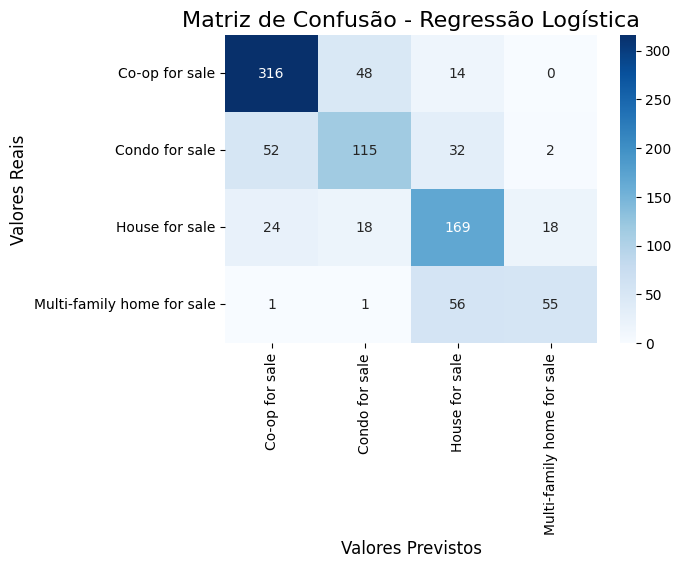

In [627]:
max_iter = 1000

log_reg_model = LogisticRegression(
    max_iter=max_iter,
    random_state=42
)

log_reg_model.fit(X_train_class_processed, y_train_class)

predictions_lr = log_reg_model.predict(X_test_class_processed)

avaliar_modelo_classificacao(y_test_class, predictions_lr, 'Regressão Logística')

#### Árvore de Decisão

O critério para escolha dos hiperparâmetros é o mesmo utilizado na Árvore de Regressão: evitar o _overfitting_.

Modelo: Árvore de Decisão
Acurácia: 0.6927
Precisão: 0.6867
Recall: 0.6927
F1-Score: 0.6863


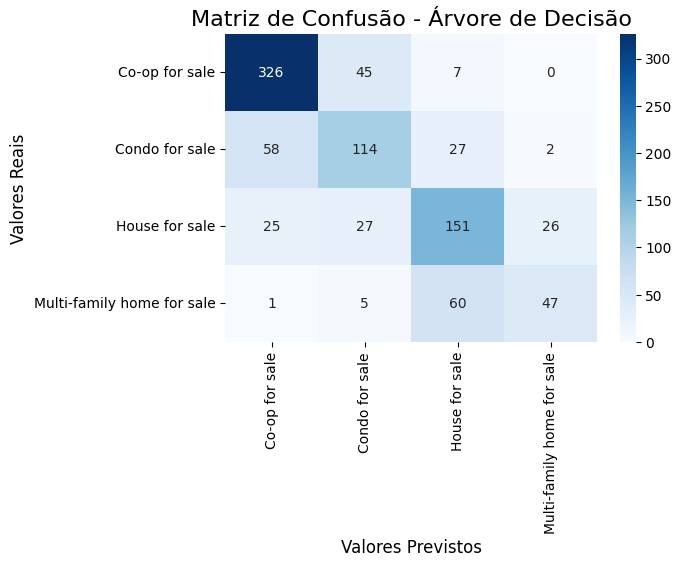

In [628]:
max_depth = 10
min_samples_leaf = 5

tree_model = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    random_state=42
)

tree_model.fit(X_train_class_processed, y_train_class)

predictions_tree = tree_model.predict(X_test_class_processed)

avaliar_modelo_classificacao(y_test_class, predictions_tree, 'Árvore de Decisão')

#### Random Forest Classifier

Assim como o modelo Random Forest de regressão, o de classificação não sofre tanto com _overfitting_, o que possibilita uma profundidade maior e um número de folhas menor. Da mesma forma, `n_estimators = 100` pode causar um ganho de resultado sem grande impacto computacional.

Modelo: Random Forest
Acurácia: 0.7242
Precisão: 0.7220
Recall: 0.7242
F1-Score: 0.7204


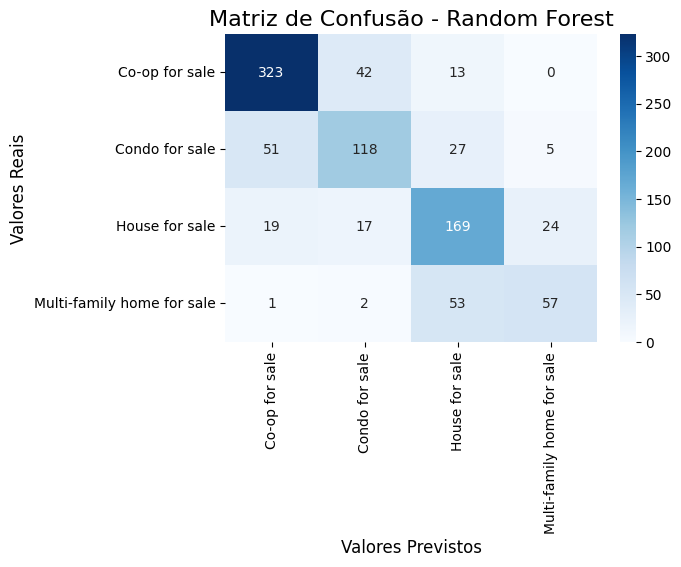

In [629]:
n_estimators = 100
max_depth = 15
min_samples_leaf = 4

rf_model_class = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    random_state=42,
)

rf_model_class.fit(X_train_class_processed, y_train_class)

predictions_rf = rf_model_class.predict(X_test_class_processed)

avaliar_modelo_classificacao(y_test_class, predictions_rf, 'Random Forest')

#### SVC

Tal qual o SVR, o modelo SVC do *sklearn* já utiliza padrões modernos de algoritmos baseados em SVM - Support Vector Machine.

Modelo: SVC
Acurácia: 0.7210
Precisão: 0.7192
Recall: 0.7210
F1-Score: 0.7165


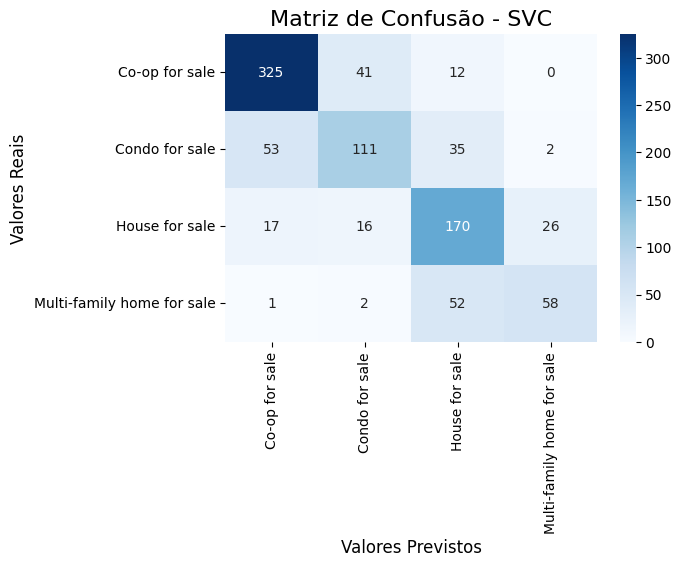

In [630]:
svc_model = SVC(
    random_state=42
)

svc_model.fit(X_train_class_processed, y_train_class)

predictions_svc = svc_model.predict(X_test_class_processed)

avaliar_modelo_classificacao(y_test_class, predictions_svc, 'SVC')

#### K-NN

Manteremos o padrão `n_neighbors = 5`, que é um valor não tão sensível ao ruido, e `weights = 'distance'`, fazendo com que pontos mais próximos influenciem mais na classificação.

Modelo: K-NN
Acurácia: 0.6971
Precisão: 0.6935
Recall: 0.6971
F1-Score: 0.6948


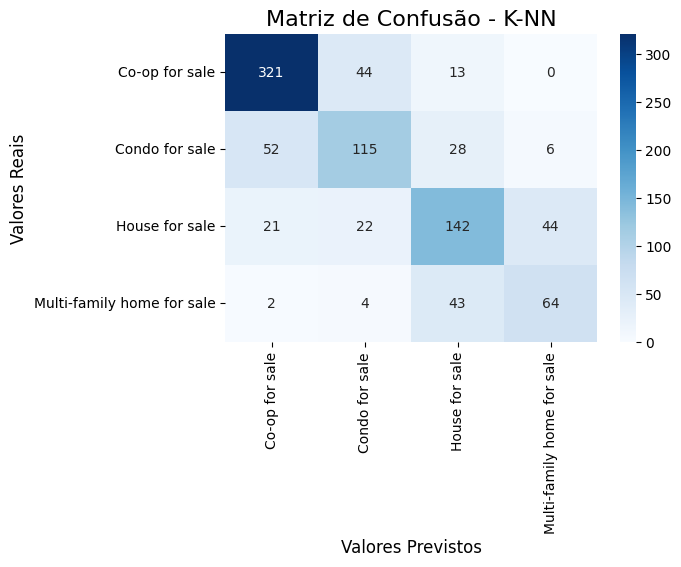

In [631]:
weights = 'distance'

knn_model = KNeighborsClassifier(
    weights=weights,
)

knn_model.fit(X_train_class_processed, y_train_class)

predictions_knn = knn_model.predict(X_test_class_processed)

avaliar_modelo_classificacao(y_test_class, predictions_knn, 'K-NN')

### Avaliação

In [632]:
classification_results_table = pd.DataFrame(classification_results)
classification_results_table.sort_values(
    by='F1-Score', ascending=False
).round(4).T

,2,3,0,4,1
Modelo,Random Forest,SVC,Regressão Logística,K-NN,Árvore de Decisão
Acurácia,0.7242,0.7210,0.7112,0.6971,0.6927
Precisão,0.7220,0.7192,0.7129,0.6935,0.6867
Recall,0.7242,0.7210,0.7112,0.6971,0.6927
F1-Score,0.7204,0.7165,0.7074,0.6948,0.6863


### Conclusão

|          |              |       |                    |       |                  |
|:---------|:--------------|:-------|:--------------------|:-------|:------------------|
| Modelo   | Random Forest | SVC    | Regressão Logística | K-NN   | Árvore de Decisão |
| Acurácia | 0.7242        | 0.721  | 0.7112              | 0.6971 | 0.6927            |
| Precisão | 0.722         | 0.7192 | 0.7129              | 0.6935 | 0.6867            |
| Recall   | 0.7242        | 0.721  | 0.7112              | 0.6971 | 0.6927            |
| F1-Score | 0.7204        | 0.7165 | 0.7074              | 0.6948 | 0.6863            |

O modelo **Random Forest** apresentou os melhores resultados em todas a métricas, seguido pelo **SVC** com resultados levemente inferiores. A **Regressão Logística** teve resultados razoáveis, enquanto os modelos **K-NN** e **Árvore de Decisão** obtiveram métricas consistemente abaixo de 0.7, o que sugere que talvez não sejam suficientemente robustos para lidar com a complexidade do conjunto de dados.